In [1]:
from rockpool.nn.modules import LIFJax, LinearJax
from rockpool.nn.combinators import Sequential
import numpy as np

/Users/ugurcancakal/rockpool/lib/python3.10/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
from rockpool.devices.dynapse.dynapsim import DynapSim

In [3]:
N = 10

ds_mod = DynapSim.from_specification(
    (4 * N, N),
)

In [4]:
dse_net = Sequential(
    LinearJax((5, 4*8)),
    DynapSim.from_specification((4*8, 8), dt = 1e-3),
    # LIFJax((4*8))
#     LinearJax((8, 4*10)),
#     DynapSim.from_specification((4*10, 10), dt = 1e-3),
)
dse_net

JaxSequential  with shape (5, 8) {
    LinearJax '0_LinearJax' with shape (5, 32)
    DynapSim '1_DynapSim' with shape (32, 8)
}

In [5]:
dse_net.state()

{'0_LinearJax': {},
 '1_DynapSim': {'iahp': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'iampa': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'igaba': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'imem': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'inmda': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'ishunt': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'spikes': DeviceArray([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
  'timer_ref': DeviceArray([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
  'vmem': DeviceArray([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
  'rng_key': DeviceArray

In [6]:
dse_net[0].weight = np.clip(dse_net[0].weight, 5e-13, np.inf)
dse_net[0].weight

# dse_net[2].weight = np.clip(dse_net[2].weight * 1e-12, -np.inf, np.inf)
# dse_net[2].weight

array([[4.92595914e-01, 6.18790550e-01, 1.46073000e-01, 1.54355614e-01,
        5.00000000e-13, 7.09207974e-01, 5.00000000e-13, 6.51995077e-02,
        5.00000000e-13, 5.00000000e-13, 5.00000000e-13, 8.05803129e-01,
        5.00000000e-13, 1.03543077e+00, 5.00000000e-13, 6.33036993e-01,
        5.00000000e-13, 5.00000000e-13, 5.00000000e-13, 5.00000000e-13,
        5.00000000e-13, 7.08322378e-01, 1.03942962e+00, 2.38628266e-01,
        4.32300828e-03, 9.02544428e-01, 5.00000000e-13, 2.18066156e-01,
        6.03524987e-01, 8.90833692e-01, 5.00000000e-13, 1.38116606e-01],
       [7.31649581e-01, 4.08479365e-01, 5.66043560e-01, 1.00791484e+00,
        5.00000000e-13, 1.02694988e+00, 9.05132119e-01, 6.19562426e-01,
        9.91575093e-02, 7.34929917e-01, 5.00000000e-13, 5.00000000e-13,
        5.54560859e-01, 5.00000000e-13, 5.00000000e-13, 5.00000000e-13,
        6.73457902e-02, 5.00000000e-13, 8.08306154e-01, 5.00000000e-13,
        8.27865668e-01, 5.00000000e-13, 7.83138136e-01, 1.41847

In [7]:
import jax
import matplotlib.pyplot as plt

In [8]:
# jdse_net = jax.jit(dse_net)

In [9]:
import numpy as np

fP = 0.01
T = 1000
dt = 1e-3
spikes = np.random.rand(1, T, 5) < fP

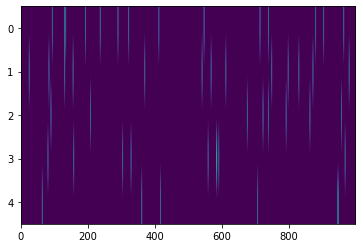

In [10]:
plt.imshow(spikes.T, aspect='auto')

In [11]:
# dse_net[0].w_rec.T.shape

In [12]:
out, state, record_dict = dse_net(spikes)

In [13]:
out.shape

(1, 1000, 8)

In [14]:
record_dict["1_DynapSim"]["imem"]

DeviceArray([[[5.1312118e-13, 4.8832357e-13, 5.0882497e-13, ...,
               4.9298418e-13, 5.2545815e-13, 5.0605201e-13],
              [5.1312118e-13, 4.8832357e-13, 5.0882497e-13, ...,
               4.9298418e-13, 5.2545815e-13, 5.0605201e-13],
              [5.1312118e-13, 4.8832357e-13, 5.0882497e-13, ...,
               4.9298418e-13, 5.2545815e-13, 5.0605201e-13],
              ...,
              [5.1312118e-13, 4.8832357e-13, 5.0882497e-13, ...,
               4.9298418e-13, 5.2545815e-13, 5.0605201e-13],
              [5.1312118e-13, 4.8832357e-13, 5.0882497e-13, ...,
               4.9298418e-13, 5.2545815e-13, 5.0605201e-13],
              [5.1312118e-13, 4.8832357e-13, 5.0882497e-13, ...,
               4.9298418e-13, 5.2545815e-13, 5.0605201e-13]]],            dtype=float32)

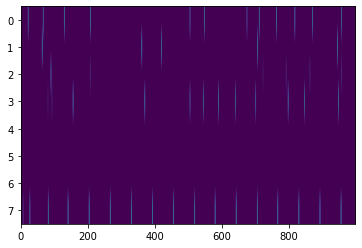

In [15]:
plt.imshow(out.T, aspect = 'auto')

In [16]:
state

{'0_LinearJax': {},
 '1_DynapSim': {'iahp': DeviceArray([[8.0573898e-10, 5.0155480e-10, 2.1757915e-10, 5.8479332e-10,
                5.1113166e-13, 4.9298418e-13, 5.2545815e-13, 9.0792818e-10]],            dtype=float32),
  'iampa': DeviceArray([[7.9237791e-03, 1.5363467e-01, 4.1006221e-03, 1.0481839e-02,
                5.1113166e-13, 1.1837631e-02, 5.2545815e-13, 1.7059876e-01]],            dtype=float32),
  'igaba': DeviceArray([[2.1261042e-02, 3.8073972e-02, 1.3652697e-05, 1.0931261e-02,
                1.3732712e-01, 1.3457781e-01, 6.0620461e-02, 3.4833819e-02]],            dtype=float32),
  'imem': DeviceArray([[5.1312118e-13, 4.8832357e-13, 5.0882497e-13, 4.8784989e-13,
                5.1113166e-13, 4.9298418e-13, 5.2545815e-13, 5.0605201e-13]],            dtype=float32),
  'inmda': DeviceArray([[0.06834935, 0.11206826, 0.0334309 , 0.12447365, 0.05529706,
                0.22506858, 0.14419308, 0.15493402]], dtype=float32),
  'ishunt': DeviceArray([[1.7944681e-02, 1.8641353e-0

In [17]:
# new_params = devices.dynapse.regen_mismatch(net)
#     # - Iterate through network
#     # Look for DynapSim modules
#     # Generate new mismatched parameters for all DynapSim modules
#     # Return the new parameter dict for the entire network
# net = net.set_attributes(new_params)

In [18]:
# DynapSim(use_mismatch = True, mismatch_scale = 0.05, mismatch_sigma_rule = 2.0)

In [19]:
# net = Sequential(
#     LinearJax((5, 10)),
#     LIFJax((10,)),
#     LinearJax((10, 20)),
#     LIFJax((20,))
# )

# # Train...

# graph = net.as_graph()
# dse_spec = dynapse.mapper(graph)
# Q_dse_spec = dynapse.quantise(dse_spec) # Uses `WeightParameters`

# dsim_net = DynapSim.from_specification(Q_dse_spec)
# dsamna_net = DynapSamna.from_specification(Q_dse_spec)

# # or

# high_level_config = ...
# low_level_hw_config = samna.dynapse.config....

# dse_config = dynapse.config_from_specification(Q_dse_spec)

# dsim_net = DynapSim(high_level_config)
# dsim_net = DynapSim(low_level_hw_config)

# hdk_device = dynapse.find_dynapse_hdks()[0]

# dsamna_net = DynapSamna(low_level_hw_config: samna.dynapse.config.DynapSE2Configuration, hdk_device, dt = 1e-3)
# dsamna_net = DynapSamna(high_level_config: rockpoo.devices.dynapse.config..., hdk_device, dt = 1e-3)